<h1><center>Exercises 3 for Kuhn&Johnson.</center></h1>

# E1.1  
Loading Data

In [1]:
import numpy as np
import mpmath as mpmath
import math as math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kurtosis, skew
from scipy import stats
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
%matplotlib inline

data = pd.read_csv('EEG_data.csv')

df = pd.DataFrame(data)


# E1.2  
Changing type of SubjectID and VideoID to integer

In [2]:
df['VideoID'] = df.VideoID.astype(int)
df['SubjectID'] = df.SubjectID.astype(int)
print(df.dtypes)

SubjectID               int32
VideoID                 int32
Attention             float64
Mediation             float64
Raw                   float64
Delta                 float64
Theta                 float64
Alpha1                float64
Alpha2                float64
Beta1                 float64
Beta2                 float64
Gamma1                float64
Gamma2                float64
predefinedlabel       float64
user-definedlabeln    float64
dtype: object


# E1.3  
Taking the median of data column

In [3]:
df = df.groupby(['SubjectID', 'VideoID']).median()

# E1.4  
Changing the name to ExpectedConfusion and ReportedConfusion (also types to integer)

In [4]:
df = df.rename(columns={'predefinedlabel': 'ExpectedConfusion', 'user-definedlabeln': 'ReportedConfusion'})

df['ExpectedConfusion'] = df.ExpectedConfusion.astype(int)
df['ReportedConfusion'] = df.ReportedConfusion.astype(int)

print(df.dtypes)

Attention            float64
Mediation            float64
Raw                  float64
Delta                float64
Theta                float64
Alpha1               float64
Alpha2               float64
Beta1                float64
Beta2                float64
Gamma1               float64
Gamma2               float64
ExpectedConfusion      int32
ReportedConfusion      int32
dtype: object


# E2.  
Show that same outliers in Attention and Mediation

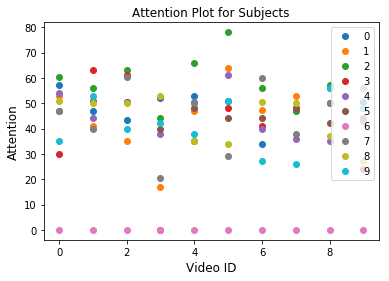

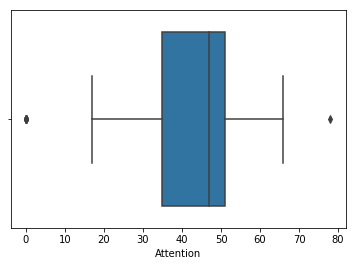

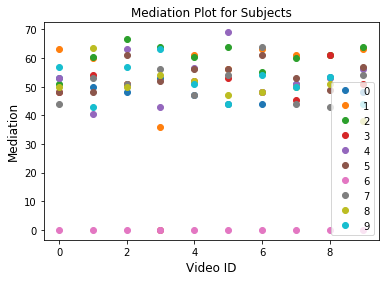

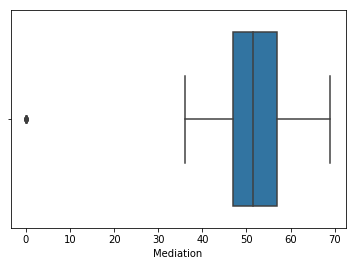


Zscores for Attention
 [0.88891648 0.32182463 0.12334248 0.60537056 0.66207974 0.54866137
 0.41539478 0.35017922 0.8322073  0.52030678 0.66207974 0.01843049
 0.3586856  1.37945094 0.32182463 1.28588078 0.35017922 0.66207974
 0.49195218 0.37853381 1.08739863 0.8322073  1.2291716  0.15169707
 1.39929915 2.07980938 0.8322073  0.32182463 0.88891648 0.09498789
 0.64223153 1.2291716  1.11575323 2.34350709 0.3586856  0.37853381
 0.01843049 0.37853381 0.49195218 0.98248664 0.71878893 0.15169707
 0.52030678 0.18855804 0.52030678 1.11575323 0.07513967 0.30197641
 0.3586856  0.09498789 0.32182463 0.54866137 0.52030678 0.07513967
 0.37853381 0.15169707 0.15169707 0.37853381 0.0382787  0.15169707
 2.34350709 2.34350709 2.34350709 2.34350709 2.34350709 2.34350709
 2.34350709 2.34350709 2.34350709 2.34350709 0.32182463 0.07513967
 1.08739863 1.18096879 0.49195218 0.69894071 1.05904404 0.18855804
 0.49195218 0.8322073  0.54866137 0.49195218 0.49195218 0.66207974
 0.3586856  0.41539478 0.52030678 0.49

In [5]:
arr = [0,1,2,3,4,5,6,7,8,9]

for i in range(10):
    plt.plot(arr, df['Attention'][i], 'o', label='{}'.format(i))
    
plt.title('Attention Plot for Subjects')
plt.xlabel(r'Video ID', fontsize=12)
plt.ylabel(r'Attention', fontsize=12)
plt.legend()
plt.show()

plt.figure()
sns.boxplot(x=df['Attention'])
plt.show()

for i in range(10):
    plt.plot(arr, df['Mediation'][i], 'o', label='{}'.format(i))
    
plt.title('Mediation Plot for Subjects')
plt.xlabel(r'Video ID', fontsize=12)
plt.ylabel(r'Mediation', fontsize=12)
plt.legend()
plt.show()

plt.figure()
sns.boxplot(x=df['Mediation'])
plt.show()

z = np.abs(stats.zscore(df['Attention']))
print('\nZscores for Attention\n',z,'\n')
print('\nAll values above 2\n',np.where(z > 2),'\n')

z = np.abs(stats.zscore(df['Mediation']))
print('\nZscores for Mediation\n\n',z,'\n')
print('\nAll values above 2\n',np.where(z > 2),'\n')


# E3. 

As can be seen from, Plot of BoxPlot of Attention and Plot of BoxPlot of Mediation both of these graphs have outlier as Subject 6. Moreover, Using Zscores, we can catch all the points that could be the outliers. For Attention i have [25, 33, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69] (where Subject 0 includes 0 - 9, Subject 1 to 10 - 19, Subject 2 to 20 - 29... so on). In these points, All the points from subject 6 is deemed as outliers. As for Mediation, i have [33, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]. This also results same as Attention where All the points of subject 6 is included. Therefore, Subject 6 is outlier. As for points 25 and 33, We have Zscore very close to 0 in other points included in same Subject, so these cannot be counted as outliers.

# E4.  

Exclude the Outlier Subject From the Data

In [6]:
df = df.drop([6])
print(df)

                   Attention  Mediation   Raw      Delta     Theta   Alpha1  \
SubjectID VideoID                                                             
0         0             57.0       53.0  41.0   304329.0   81382.5  13622.0   
          1             47.0       50.0  33.0   578197.0  109448.0  23867.5   
          2             43.5       48.0   7.5   463542.0   96455.0  18521.0   
          3             52.0       53.0  37.0   471965.5   64971.0  15899.5   
          4             53.0       47.0  28.0   301557.0   45817.5  14845.5   
          5             51.0       44.0  35.0   750444.0  176070.0  35332.0   
          6             34.0       44.0  47.5   684449.5  125049.5  24340.5   
          7             47.5       51.0  30.5   301434.5   63380.5  15250.0   
          8             56.0       53.5  31.5   845370.0  134007.5  21442.0   
          9             50.5       48.0  28.0   349929.0   63562.5  13972.5   
1         0             53.0       63.0  39.0   1303

# E5-6.  
Plot Densities and calculate skewness. Make skewness-corrected version.

8


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


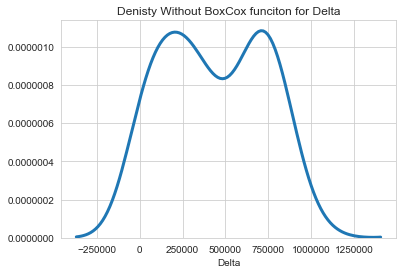

(array([3717.88996044, 5508.41244751, 4810.99715177, 4864.35895688,
       3697.1087486 , 6462.25091308, 6108.00812737, 3696.18868208,
       6951.28231407, 4049.85949683, 2212.07085603, 3527.15328122,
       4537.33449152, 6383.74582893, 3152.1822994 , 2495.71075193,
       2812.15383735, 3038.36599215, 2680.82983741, 2131.29781298,
        438.12063386,  525.96944008,  445.98670268,  373.87726901,
        401.89408219,  452.27943318,  375.95137707,  534.80151116,
        423.28290732,  409.57487383, 5635.57379581, 3797.09470302,
       4734.01001635, 4279.65973557, 6993.13725292, 5719.95240051,
       6447.60507225, 6411.0940862 , 5829.6373436 , 7142.9565718 ,
       1725.76983238, 3072.64784861, 2158.07890536, 3550.17424722,
       2017.21687429, 1630.50561586, 2824.68718467, 2955.0703452 ,
       2739.16200959, 1913.16288613, 3663.52809045, 5792.82059003,
       6003.13679181, 6781.75782797, 3874.68403425, 6020.70656683,
       6610.51823628, 5076.3124219 , 6572.59425531, 3720.8527

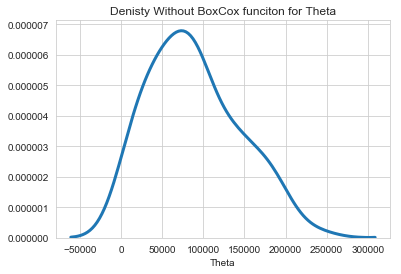

(array([ 746.41602157,  873.38603657,  816.78907807,  662.37318036,
        550.31726144, 1123.66016049,  937.31100465,  653.7213079 ,
        972.31981171,  654.71647843,  551.37783933,  785.73153578,
        777.47707955, 1177.26824036,  722.83577492,  558.72350592,
        648.37798224,  597.68619754,  595.77273846,  592.90271951,
        255.8986844 ,  275.77197007,  238.4553799 ,  256.83940265,
        283.24953658,  310.82850001,  240.59976789,  296.55384738,
        248.98153647,  247.96286286,  810.62650455,  809.9527738 ,
        768.4357161 ,  517.42640733, 1116.18524887,  945.15016627,
       1135.51085381,  964.49895751,  939.26583567, 1207.78592673,
        376.61947956,  630.5079414 ,  480.19295422,  669.73790406,
        431.03911136,  420.19323031,  542.21228382,  594.66965343,
        555.72226902,  414.36674551,  871.91068771, 1039.02191384,
       1011.60664551, 1319.36461417,  743.4365168 , 1002.54555563,
       1177.2893278 ,  812.78902862, 1123.58745637,  776.4092

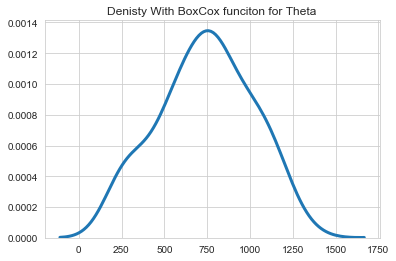

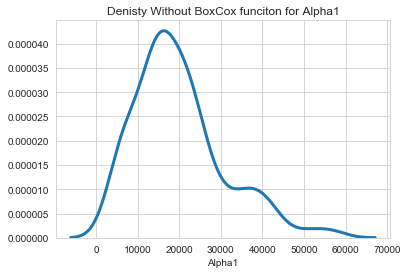

(array([43.42328418, 51.00290526, 47.4352311 , 45.40129461, 44.51369464,
       57.01695257, 51.28911066, 44.85964474, 49.46598694, 43.7427707 ,
       42.04504423, 47.84802632, 47.58040865, 52.87207188, 47.09323122,
       44.38756237, 44.1818933 , 44.53786324, 43.10192207, 45.16524264,
       32.33791128, 35.0754598 , 34.14254885, 32.7714823 , 35.2897577 ,
       35.51613875, 31.18124714, 35.21504559, 31.415494  , 32.77894641,
       51.2117642 , 50.5644368 , 45.39061412, 38.9355042 , 59.48049219,
       52.5501608 , 56.97350228, 55.49856827, 51.15438794, 65.13278524,
       37.25954298, 42.33117996, 38.26932324, 44.71764404, 37.84279214,
       38.81189915, 39.6536684 , 44.8520212 , 42.77626079, 38.5902261 ,
       45.71392656, 52.44861886, 58.25639574, 57.8455964 , 48.32133956,
       55.21195256, 60.76409917, 48.52331889, 53.99096033, 47.45504511,
       43.05779594, 49.50945661, 40.6545009 , 52.98314032, 43.08785175,
       49.33697712, 44.62476619, 46.83865806, 44.50116559, 43.2

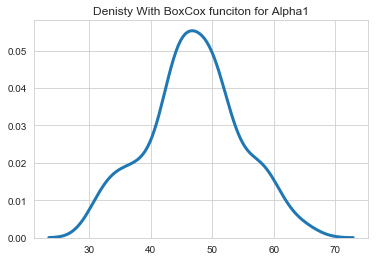

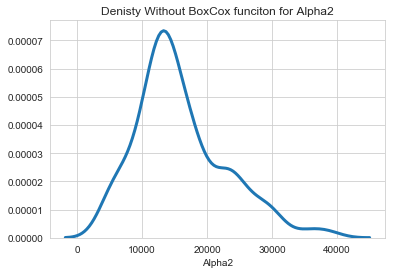

(array([43.11915429, 45.49845893, 42.15844008, 41.92094051, 39.94216565,
       49.83600246, 45.3896027 , 40.46220174, 43.61388836, 41.19331896,
       42.00330778, 45.12540295, 43.24551481, 48.98696602, 46.65230597,
       42.36547846, 41.54335595, 41.40269227, 41.83625846, 43.94434998,
       32.18382925, 34.68678587, 34.56008825, 31.56566567, 38.83765076,
       36.22511256, 31.82072129, 33.62862982, 32.48117316, 34.22981574,
       51.80847537, 43.06860632, 43.19534687, 37.24686562, 51.27248058,
       43.40677945, 49.47843181, 42.35353376, 46.29237443, 53.16411894,
       39.46326654, 43.31983649, 38.42236413, 41.01565194, 38.49002665,
       39.49298204, 38.00441162, 42.47897998, 42.91470645, 38.20437658,
       44.33034564, 45.57243332, 50.27157062, 46.47559327, 41.25980907,
       48.38745419, 53.69133126, 44.99808311, 48.43203363, 43.11915429,
       42.70277282, 45.17023314, 40.35643985, 46.06030892, 41.96852884,
       49.63153882, 40.91101142, 42.27429606, 39.8977727 , 42.0

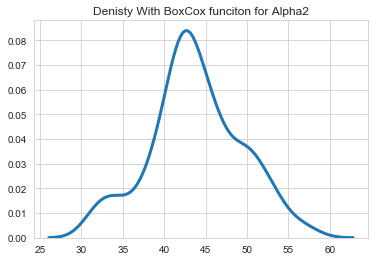

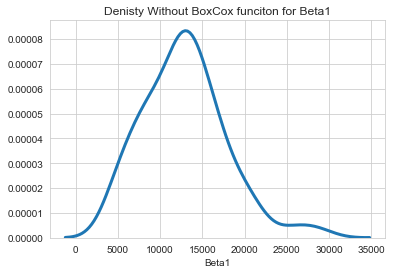

(array([135.87342692, 150.72098089, 134.96454775, 124.63786496,
       133.33100399, 145.72218411, 122.95366863, 130.86327171,
       127.72266024, 128.29460723, 137.07558668, 133.47639253,
       129.88143283, 138.52484158, 133.20018564, 132.49675978,
       125.99749296, 140.79133973, 130.62089461, 146.35386722,
        83.73215527,  86.32706279,  87.90185289,  85.52155567,
       121.33638304, 115.16518586,  84.52161461, 101.17394147,
        90.00588339,  85.34330732, 127.74944141, 126.44188752,
       130.74215754,  90.4577112 , 158.12225992, 147.51433155,
       144.29219616, 140.26820909, 135.99468792, 183.99457415,
       107.44726482, 121.12832024, 111.90245018, 126.03157605,
       101.58276943, 110.60854566, 101.28923886, 127.98346034,
       123.45931925, 101.84509171, 100.05138112, 146.82990504,
       152.34210985, 144.47434202, 104.19915618, 161.85251846,
       178.88806787, 112.32409751, 156.56322014, 100.39878204,
       143.35195765, 122.85502779, 134.11864593, 131.1

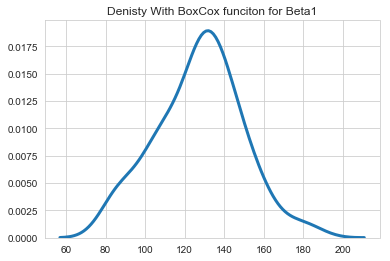

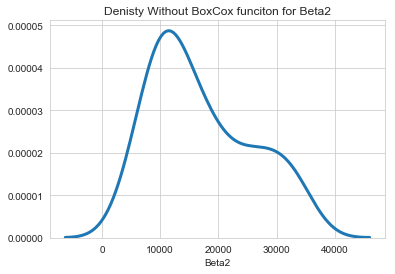

(array([24.8238565 , 24.55587415, 24.29426852, 24.76850819, 24.49274686,
       24.25129438, 23.60662115, 24.88723109, 23.77372681, 22.47784517,
       18.75379788, 19.72358233, 19.69879254, 21.44121785, 19.7484281 ,
       19.75126448, 18.72564227, 19.43815142, 19.2498633 , 18.64516077,
       17.60426503, 17.88119673, 17.3292956 , 16.87123896, 21.47721384,
       19.85629339, 17.5121825 , 19.00080243, 17.49421684, 17.10244342,
       22.6193095 , 20.33513967, 20.10222146, 23.34265546, 22.12009442,
       20.12755938, 20.8147344 , 20.2547697 , 20.63043146, 22.92102087,
       20.07692107, 20.95312559, 18.76698578, 19.8634938 , 18.94851567,
       19.62360833, 19.38827903, 20.59932306, 20.94492209, 18.53402326,
       20.44617815, 21.95531535, 22.26327772, 19.95066397, 19.45371309,
       22.2123415 , 22.05448337, 20.0974881 , 20.81292619, 19.61407417,
       24.61455738, 21.99723011, 22.52458747, 20.52256961, 23.23167937,
       22.55431203, 23.21029666, 24.47376714, 24.11791661, 23.8

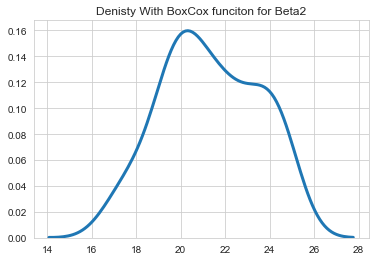

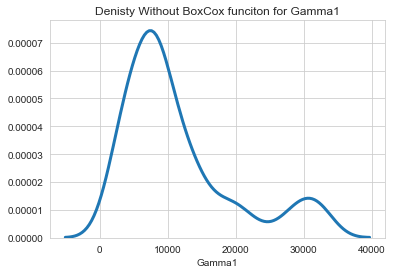

(array([8.23714874, 8.24309074, 8.18748612, 8.28303017, 8.22142641,
       8.30068124, 7.99387695, 8.23725613, 8.29570332, 7.95008321,
       6.86288156, 6.97490621, 6.85192444, 7.4859906 , 7.11705569,
       7.13931891, 6.83173308, 6.97753219, 6.92558063, 6.72843101,
       6.71191856, 6.75329466, 6.62344414, 6.59695223, 7.49844781,
       7.18016794, 6.59976097, 7.12540683, 6.66438339, 6.51027261,
       7.67029796, 7.36627499, 7.29508106, 6.99554859, 7.47633789,
       7.3117247 , 7.45190726, 7.34291286, 7.32952048, 7.69082606,
       7.37502507, 7.61011087, 7.11731228, 7.46552913, 7.11151442,
       7.27819555, 7.13751837, 7.4790116 , 7.37127113, 6.95712635,
       7.38276514, 7.33490186, 7.45381143, 7.24245478, 7.28999299,
       7.49446521, 7.60725235, 7.36378411, 7.27125472, 7.29940355,
       8.09584623, 7.77447924, 7.70610482, 7.70503306, 7.84496088,
       7.92538419, 7.74607762, 8.02789315, 7.99680215, 7.99510947,
       7.55656366, 7.42255996, 7.41795049, 7.49809324, 7.4763

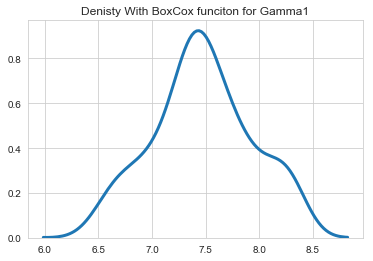

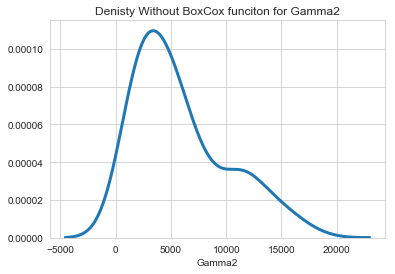

(array([13.77656807, 13.4166451 , 13.42010851, 13.5670883 , 13.55565552,
       14.05464646, 12.94366624, 13.45148071, 13.58099925, 12.97763655,
       10.93498418, 10.94167227, 10.74919851, 10.3079418 , 11.50870471,
       11.73411645, 10.61828443, 11.16004155, 11.16248479, 10.53556411,
       10.5306963 , 10.4227477 , 10.15364391,  9.77016292, 12.51206524,
       11.40385092, 10.34835529, 11.67578295, 10.46394175, 10.01734822,
       10.24675825, 11.81290271, 11.61657926,  8.71633388, 12.08857229,
       11.78843546, 11.93618432, 11.71835474, 11.57949973, 11.77449191,
       12.12694013, 13.15489651, 11.77029008, 12.61905375, 11.73187228,
       12.11462513, 11.88212224, 12.41793471, 12.07395438, 11.29826168,
        9.46744586, 10.85352802, 10.8649235 , 11.47698707,  9.33066422,
       11.14668631, 11.59986895,  9.55308542, 10.75421579,  9.28973751,
       14.38043105, 13.42511152, 13.35361605, 12.83321436, 13.70706431,
       13.73906695, 13.24754536, 14.13872761, 14.0928718 , 13.8

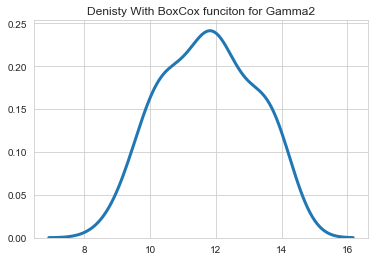

In [7]:
skewed_df = np.zeros((8, 90))
unskewed_df = np.zeros((8, 90))
print(len(skewed_df))
i = 0
for column in df.columns:    
    if 3 <= i and i <= 10:         
        plt.figure(i)
        sns.set_style('whitegrid')
        sns.distplot(df[column], hist = False, kde = True,
                     kde_kws = {'linewidth': 3}).set_title('Denisty Without BoxCox funciton for {}'.format(column)) 
        skew_before_log = skew(df[column])
        plt.show()
        
        log_data = stats.boxcox(df[column])
        print(log_data)
        skew_after_log = skew(log_data[0])
        print('Skewness of prediction {} (Before BoxCox): {}'.format( column, skew_before_log ))
        print('Skewness of prediction {} (After BoxCox): {}'.format( column, skew_after_log ))
        
        skewed_df[i-3] = df[column]
        if(abs(skew_before_log) > abs(skew_after_log)):
            df[column] = log_data[0]
            unskewed_df[i-3] = log_data[0]
            plt.figure()
            sns.set_style('whitegrid')
            sns.distplot(log_data[0], hist = False, kde = True,
                         kde_kws = {'linewidth': 3}).set_title('Denisty With BoxCox funciton for {}'.format(column))   
            plt.show()
        else:            
            unskewed_df[i-3] = df[column]
    i= i + 1

As can be seen from above graphs, Density is not skewed if its skewness is close to 0 or if it is more than 0.5, it can be considered as highly skewed. By applying skewness-corrected approach, I have also addedd a condition where if the skewness-corrected approach worsens the skewness, it will not be skewness approach.

# E7.  

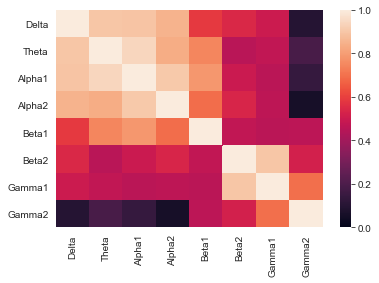

In [8]:
plt.figure()
sns.heatmap(df[df.columns[3:11]].corr(), vmin=0, vmax=1)

# E8.  

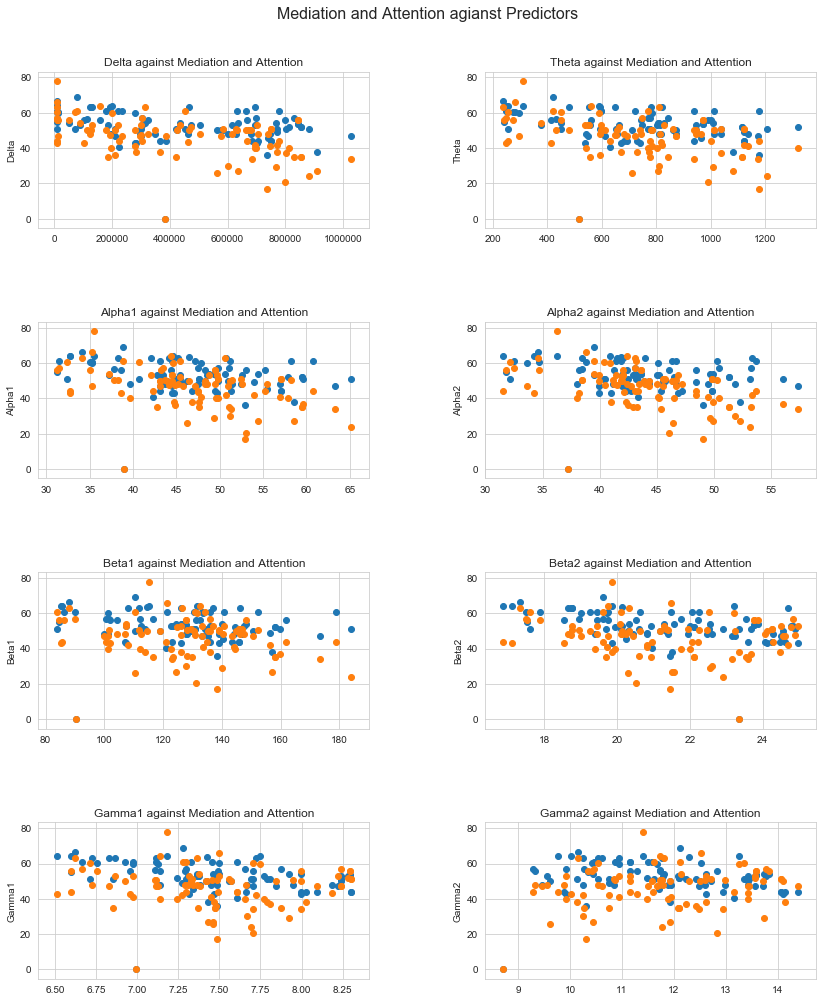

In [9]:
i = 0
# graph for Mediation

plt.figure(figsize=(12, 15))
plt.suptitle('Mediation and Attention agianst Predictors\n\n', fontsize=16)

for column in df.columns:    
    if 3 <= i and i <= 10:
        plt.subplot(4,2,i-3+1)
        plt.scatter(df[column], df["Mediation"], label = 'Mediation')
        plt.scatter(df[column], df["Attention"], label = 'Attention')
        plt.title(r'{} against Mediation and Attention'.format(column))
        plt.ylabel(r'{}'.format(column))
    i= i + 1

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=0.95, hspace=0.60, wspace=0.35)
plt.show()

# E9.  

In [10]:
Y = skewed_df
Y = Y.transpose()
model = sm.OLS(df['Attention'], Y).fit()

results = model.predict(Y)

print(model.summary())

Y = skewed_df
Y = Y.transpose()
model = sm.OLS(df['Mediation'], Y).fit()

results = model.predict(Y)

print(model.summary())

# the part i added is here 

regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(Y, df['Mediation'])
pred = regr.predict(Y)
print('Variance score: %.2f' % metrics.r2_score(df['Mediation'], pred))

# until here

                            OLS Regression Results                            
Dep. Variable:              Attention   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     59.25
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           6.88e-31
Time:                        17:26:23   Log-Likelihood:                -388.77
No. Observations:                  90   AIC:                             793.5
Df Residuals:                      82   BIC:                             813.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.242e-05   2.16e-05     -1.502      0.1

In [11]:
Y = unskewed_df
Y = Y.transpose()
model = sm.OLS(df['Attention'], Y).fit()

results_attention = model.predict(Y)

print(model.summary())


Y = unskewed_df
Y = Y.transpose()
model = sm.OLS(df['Mediation'], Y).fit()

results_mediation = model.predict(Y)

print(model.summary())


regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(Y, df['Attention'])
pred = regr.predict(Y)
print('Variance score: %.2f' % metrics.r2_score(df['Attention'], pred))

                            OLS Regression Results                            
Dep. Variable:              Attention   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           8.80e-54
Time:                        17:26:23   Log-Likelihood:                -330.54
No. Observations:                  90   AIC:                             677.1
Df Residuals:                      82   BIC:                             697.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.117e-05   1.08e-05     -1.036      0.3

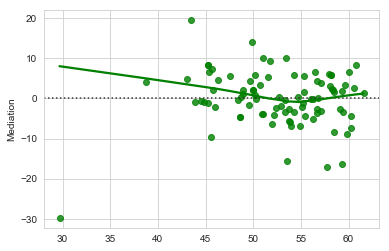

In [12]:
sns.residplot(results_mediation, df['Mediation'], lowess=True, color="g")

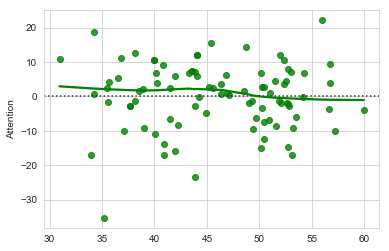

In [13]:
sns.residplot(results_attention, df['Attention'], lowess=True, color="g")

# Exercise 12

Leave One Out Cross Validation
R^2: -396.33862%, MSE: 386.10488


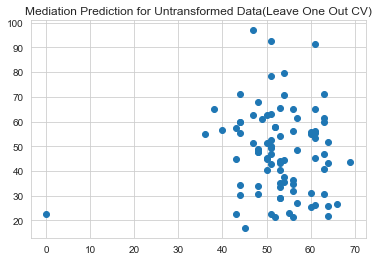

In [14]:
df['Mediation'] = list(map(int, df['Mediation']))
df['Attention'] = list(map(int, df['Attention']))

Y = skewed_df
Y = Y.transpose()

loo = LeaveOneOut()
loo.get_n_splits(Y)
ytests = []
ypreds = []

for train_idx, test_idx in loo.split(Y):
    X_train, X_test = Y[train_idx], Y[test_idx]
    y_train, y_test = df['Mediation'][train_idx], df['Mediation'][test_idx]
        
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)
        
    ytests += list(y_test)
    ypreds += list(y_pred)
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

plt.title("Mediation Prediction for Untransformed Data(Leave One Out CV)")
plt.scatter(ytests, ypreds)

Leave One Out Cross Validation
R^2: -202.62833%, MSE: 406.70296


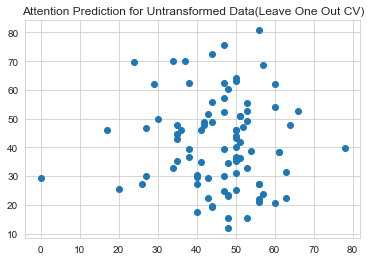

In [15]:
loo = LeaveOneOut()
loo.get_n_splits(Y)
ytests = []
ypreds = []

for train_idx, test_idx in loo.split(Y):
    X_train, X_test = Y[train_idx], Y[test_idx]
    y_train, y_test = df['Attention'][train_idx], df['Attention'][test_idx]
        
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)
        
    ytests += list(y_test)
    ypreds += list(y_pred)
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

plt.title("Attention Prediction for Untransformed Data(Leave One Out CV)")
plt.scatter(ytests, ypreds)

K-Fold Cross Validation
R^2: -438.71361%, MSE: 419.06864


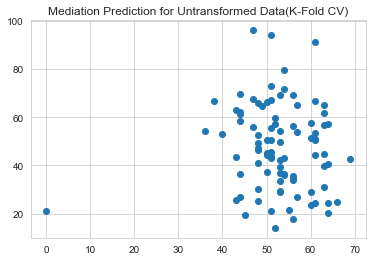

In [16]:
loo = LeaveOneOut()
loo.get_n_splits(Y)
ytests = []
ypreds = []

KFold(n_splits=12, random_state=None, shuffle=False)
kf = KFold(n_splits=12)
kf.get_n_splits(Y)


for train_idx, test_idx in kf.split(Y):    
    X_train, X_test = Y[train_idx], Y[test_idx]
    y_train, y_test = df['Mediation'][train_idx], df['Mediation'][test_idx]
    
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)
        
    ytests += list(y_test)
    ypreds += list(y_pred)
           
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("K-Fold Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

plt.title("Mediation Prediction for Untransformed Data(K-Fold CV)")
plt.scatter(ytests, ypreds)

K-Fold Cross Validation
R^2: -241.85499%, MSE: 459.41976


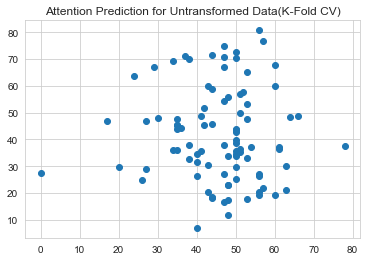

In [17]:
loo = LeaveOneOut()
loo.get_n_splits(Y)
ytests = []
ypreds = []

KFold(n_splits=12, random_state=None, shuffle=False)
kf = KFold(n_splits=12)
kf.get_n_splits(Y)


for train_idx, test_idx in kf.split(Y):    
    X_train, X_test = Y[train_idx], Y[test_idx]
    y_train, y_test = df['Attention'][train_idx], df['Attention'][test_idx]
    
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)
        
    ytests += list(y_test)
    ypreds += list(y_pred)
           
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("K-Fold Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

plt.title("Attention Prediction for Untransformed Data(K-Fold CV)")
plt.scatter(ytests, ypreds)

# Exercise 13

Leave One Out Cross Validation
R^2: 21.45391%, MSE: 61.10149
Average MSE: 61.10148987895577


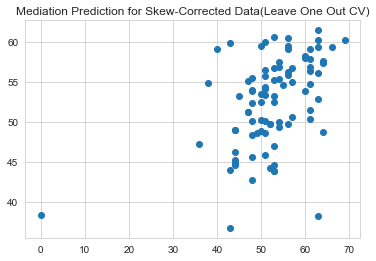

In [18]:
Y = unskewed_df
Y = Y.transpose()

loo = LeaveOneOut()
loo.get_n_splits(Y)
ytests = []
ypreds = []
ms_error_arr = []
    
for train_idx, test_idx in loo.split(Y):
    X_train, X_test = Y[train_idx], Y[test_idx]
    y_train, y_test = df['Mediation'][train_idx], df['Mediation'][test_idx]
        
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)
        
    ytests += list(y_test)
    ypreds += list(y_pred)
    
    ms_error_arr.append(metrics.mean_squared_error(y_test, y_pred))
    
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

print("Average MSE: {}".format(np.mean(ms_error_arr)))

plt.title("Mediation Prediction for Skew-Corrected Data(Leave One Out CV)")
plt.scatter(ytests, ypreds)

Leave One Out Cross Validation
R^2: 10.83130%, MSE: 119.83403
Average MSE: 119.83403462532948


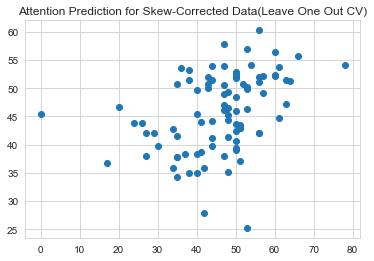

In [19]:
loo = LeaveOneOut()
loo.get_n_splits(Y)
ytests = []
ypreds = []
ms_error_arr = []

for train_idx, test_idx in loo.split(Y):
    X_train, X_test = Y[train_idx], Y[test_idx]
    y_train, y_test = df['Attention'][train_idx], df['Attention'][test_idx]
        
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)
        
    ytests += list(y_test)
    ypreds += list(y_pred)
    
    ms_error_arr.append(metrics.mean_squared_error(y_test, y_pred))
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("Leave One Out Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

print("Average MSE: {}".format(np.mean(ms_error_arr)))

plt.title("Attention Prediction for Skew-Corrected Data(Leave One Out CV)")
plt.scatter(ytests, ypreds)

K-Fold Cross Validation
R^2: 21.45391%, MSE: 61.10149


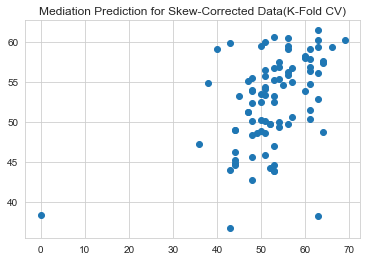

In [20]:
ytests = []
ypreds = []

KFold(n_splits=90, random_state=None, shuffle=False)
kf = KFold(n_splits=90)
kf.get_n_splits(Y)


for train_idx, test_idx in kf.split(Y):    
    X_train, X_test = Y[train_idx], Y[test_idx]
    y_train, y_test = df['Mediation'][train_idx], df['Mediation'][test_idx]
    
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)
        
    ytests += list(y_test)
    ypreds += list(y_pred)
           
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("K-Fold Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

plt.title("Mediation Prediction for Skew-Corrected Data(K-Fold CV)")
plt.scatter(ytests, ypreds)

K-Fold Cross Validation
R^2: 5.88433%, MSE: 126.48228


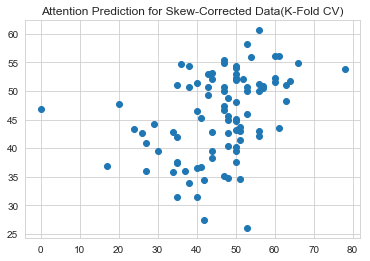

In [21]:
ytests = []
ypreds = []

KFold(n_splits=12, random_state=None, shuffle=False)
kf = KFold(n_splits=12)
kf.get_n_splits(Y)

for train_idx, test_idx in kf.split(Y):    
    X_train, X_test = Y[train_idx], Y[test_idx]
    y_train, y_test = df['Attention'][train_idx], df['Attention'][test_idx]
    
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)
        
    ytests += list(y_test)
    ypreds += list(y_pred)
           

rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
        
print("K-Fold Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

plt.title("Attention Prediction for Skew-Corrected Data(K-Fold CV)")
plt.scatter(ytests, ypreds)